___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

In [4]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [8]:
df.shape

(23486, 11)

In [9]:
# Checking for missing values
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [10]:
# Check if there are any duplicte values
sum(df.duplicated())

0

### Data Wrangling

To visulize the relationships between customer rating and item recomendations.

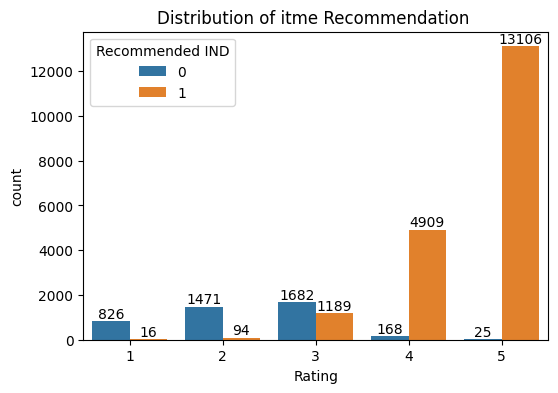

In [11]:
plt.figure(figsize = (6,4))
# To see the number
ax = sns.countplot(x="Rating", hue= 'Recommended IND', data = df)
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.title('Distribution of itme Recommendation ')
plt.show()

## Comments

The graph shows there are 94 customer that rated the items "2" and still recommend it for other customer , while there about 25 customer that gave "5" for the item and didn't recommend it.

## DF 2
Create another DF that exculed the contradicting combination between the the rating and the recommend columns

In [12]:
df2 = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df2 = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df2 = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df2 = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df2 = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

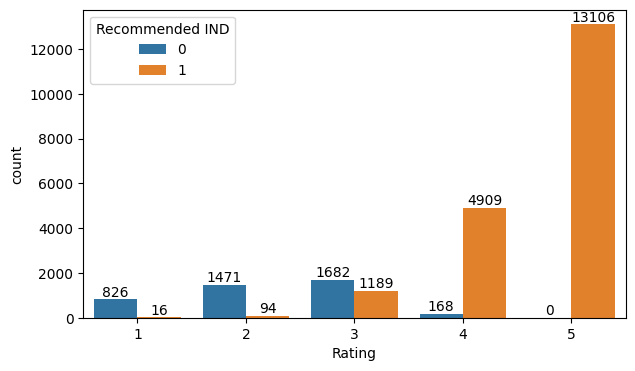

In [13]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating",
                   data=df2,
                   hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p)

#### Check Proportion of Target Class Variable:

The focus will be on the "Recommended IND" and "Review Text" columns as the main purpose of the model is to predicte weather the customer is going to recommend the item based on their text review.

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

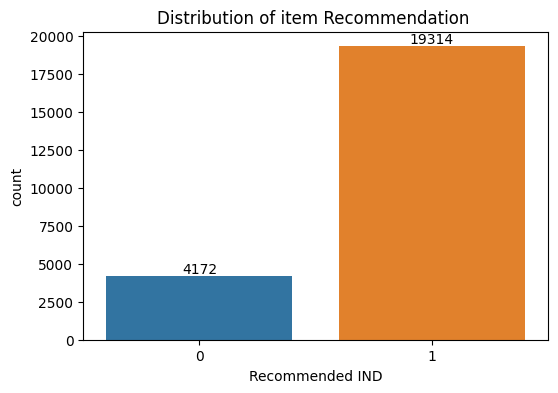

In [14]:
# Distribution of the "Recommended IND" variables (target)
plt.figure(figsize = (6,4))
ax = sns.countplot(x='Recommended IND', data=df)
ax.bar_label(ax.containers[0]);
# Set labels on the bars using ax.set_xticklabels()
plt.title('Distribution of item Recommendation ')
plt.show()

## Comments

1-The bar chart above indicates that there is an imbalanced data in the Recommend IND columns.

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [15]:
# Assuming 'df' is your DataFrame and you want to keep 'column1' and 'column2'
columns_to_keep = ['Review Text', 'Recommended IND']
df = df[columns_to_keep]

In [16]:
df.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [17]:
df['Review Text'][0]

'Absolutely wonderful - silky and sexy and comfortable'

In [18]:
# Rename the Recommended IND to label
df.rename(columns={'Recommended IND': 'recomend', 'Review Text': 'text'}, inplace=True)

---
---


### Missing Value Detection

In [19]:
# Look at the number of columns and rows
df.shape

(23486, 2)

In [20]:
# Checking for missing values in the new dataset that has only two columns "Review Text" and "Recommended IND"
df.isnull().sum()

text        845
recomend      0
dtype: int64

## Comments
The number of missing values are considerably low combared with the total number of rows, so I will drop the missing values. As dropping them are not going to have a significan affect.

In [21]:
# Droping the missing values
df.dropna(subset=['text'], inplace=True)

In [22]:
df.shape

(22641, 2)

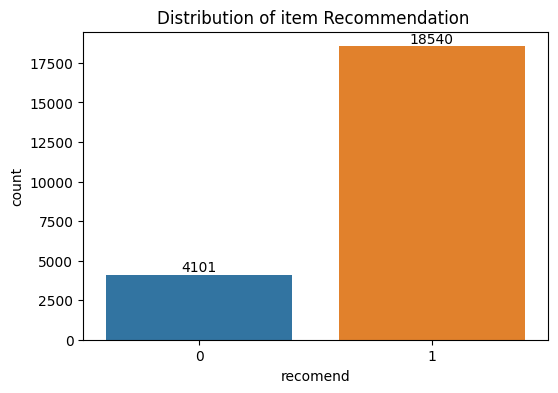

In [23]:
# Distribution of the "Recommended IND" variables (target)
plt.figure(figsize = (6,4))
ax = sns.countplot(x='recomend', data=df)
ax.bar_label(ax.containers[0]);
# Set labels on the bars using ax.set_xticklabels()
plt.title('Distribution of item Recommendation ')
plt.show()

## Checking Duplicares values

In [24]:
#Checking Dulicates vlaues
df.duplicated().sum()

7

In [25]:
df = df.drop_duplicates()

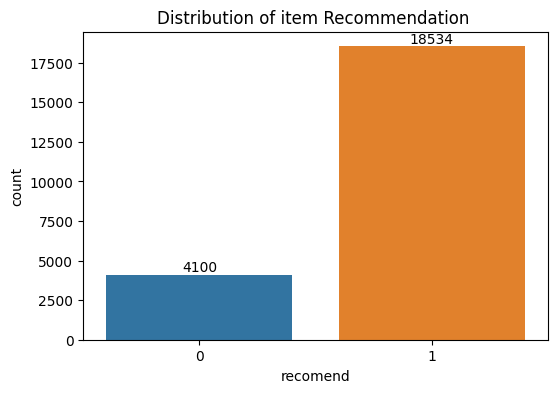

In [26]:
# Distribution of the "Recommended IND" variables (target) after d
plt.figure(figsize = (6,4))
ax = sns.countplot(x='recomend', data=df)
ax.bar_label(ax.containers[0]);
# Set labels on the bars using ax.set_xticklabels()
plt.title('Distribution of item Recommendation ')
plt.show()

## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [27]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [28]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [29]:
X = df['text']
y = df['recomend']

In [30]:
# Custom stopwords list excluding 'not' and 'no'
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.discard('not')
custom_stopwords.discard('no')

In [31]:
import re

def preprocess_text(data):
    #1. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")

    #2. Tokenize
    text_tokens = word_tokenize(data.lower())

    #3. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in custom_stopwords]

    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]


    #6. joining
    return " ".join( text_cleaned)
    # how to use ::
    # text = "I am happy"
    # cleaned_text = text.apply(cleaning)
    # print(cleaned_text)

In [32]:
# Apply preprocessing to the 'review' column
df['text'] = df['text'].apply(preprocess_text)

In [33]:
df['text'][0]

'absolutely wonderful silky sexy comfortable'

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [34]:
# Assuming you have a column 'recommended_status' indicating positive or negative reviews
positive_sentences = df[df["recomend"] == 1]["text"]
positive_sentences = positive_sentences.apply(preprocess_text)
positive_sentences

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
23479    wasnt sure ordering skirt couldnt see person f...
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes soft stretchy shiny ...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 18534, dtype: object

In [35]:
negative_sentences = df[df["recomend"] == 0]["text"]
negative_sentences = negative_sentences.apply(preprocess_text)
negative_sentences

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
22       first not pullover styling side zipper wouldnt...
25       loved material didnt really look long dress pu...
                               ...                        
23449    tried color really pretty fun donset want pair...
23450    wanted love jacket soft great color unfortunat...
23460    purchased good price typically love maeve fabr...
23478    surprised positive review product terrible cut...
23483    fit well top see never would worked im glad ab...
Name: text, Length: 4100, dtype: object

### Collect Words (positive and negative separately)

In [36]:
# Tokenize words from positive reviews
positive_words = []
for review in positive_sentences:
    words = word_tokenize(review)
    positive_words.extend(words)

In [37]:
positive_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'aded',
 'basket',
 'hte',
 'last',
 'mintue',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'darkler',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'mathced',
 'everythiing',
 'trying',
 'prefectly',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'msal

In [38]:
# Tokenize words from positive reviews
negative_words = []
for review in negative_sentences:
    words = word_tokenize(review)
    negative_words.extend(words)

In [39]:
negative_words

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'not',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'not',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'not',
 'stranger',
 'alteration',
 'shortening',
 'narrowing',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'not',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',


### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [40]:
from wordcloud import WordCloud

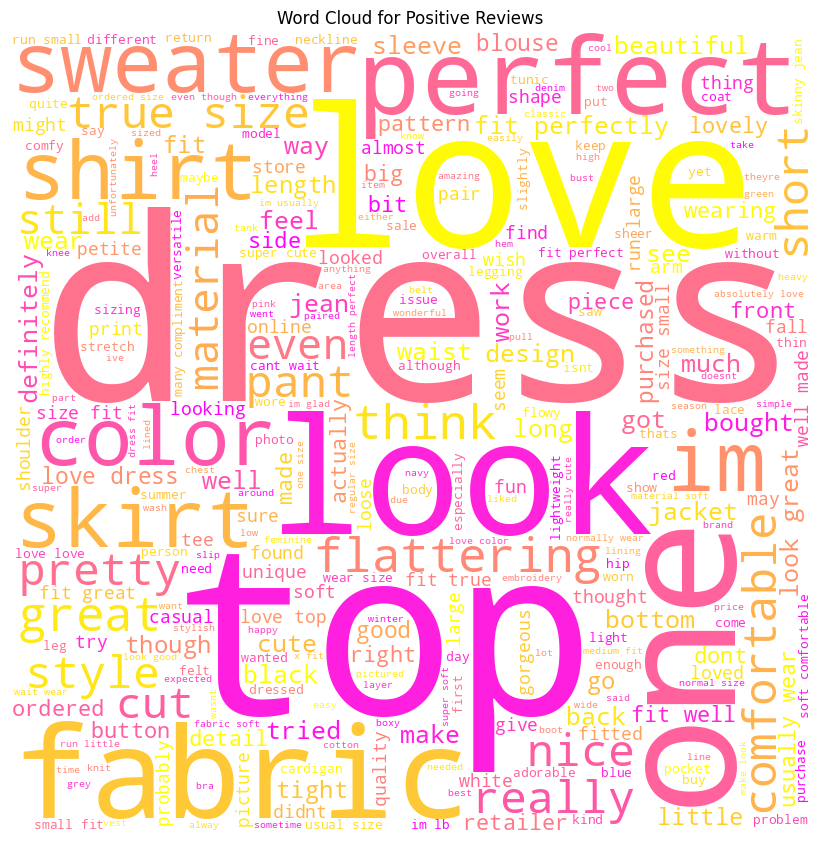

In [41]:
# Create a WordCloud object for positive reviews
positive_wordcloud = WordCloud(width=800, height=800, background_color='white', colormap = 'spring',max_words=300).generate(' '.join(positive_words))


# Plot the positive word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(positive_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Word Cloud for Positive Reviews')
plt.show()


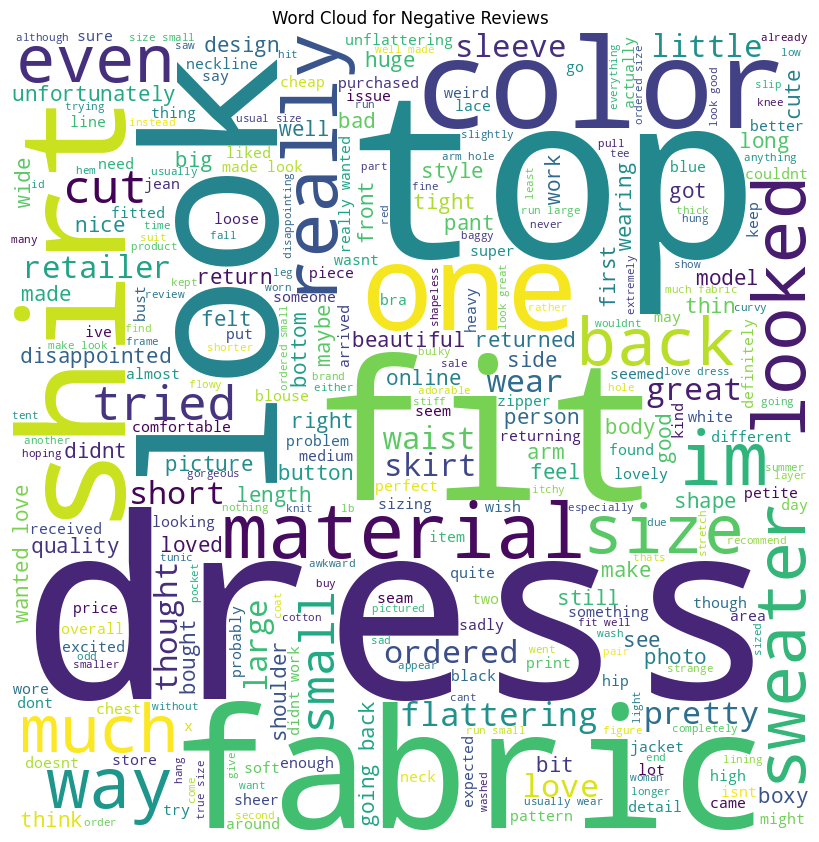

In [42]:
# Create a WordCloud object for negative reviews
negative_wordcloud = WordCloud(width=800, height=800, background_color='white',max_words=300).generate(' '.join(negative_words))

# Plot the negative word cloud with different colors
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Word Cloud for Negative Reviews')
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
df.head()

,text,recomend
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1


In [45]:
X = df['text'].apply(preprocess_text)
y = df['recomend']

In [46]:
print(f'''
shape of X {X.shape}
shape of Y {y.shape}
''')



shape of X (22634,)
shape of Y (22634,)



In [47]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [48]:
print(f'''
X_train shape is {X_train.shape}
X_test shape is {X_test.shape}
y_train shape is {y_train.shape}
y_test shape is {y_test.shape}''')


X_train shape is (18107,)
X_test shape is (4527,)
y_train shape is (18107,)
y_test shape is (4527,)


In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
# Create a CountVectorizer with a custom preprocessor function and minimum document frequency of 3
vectorizer = CountVectorizer(preprocessor = preprocess_text, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [51]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [52]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,accessory,...,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18105,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
# Create a TfidfVectorizer with a custom preprocessor function and minimum document frequency of 3
tf_idf_vectorizer = TfidfVectorizer(preprocessor=preprocess_text, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
# Transform the test data using the same TF-IDF vectorizer to maintain consistent vocabulary and weights
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [55]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,accessory,...,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.127108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Eval Function

In [57]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

def eval(model, X_train, X_test ):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("\n----------- Train Set -----------")
    print(confusion_matrix(y_train, y_pred_train))
    print("Train Set Classification Report:")
    print(classification_report(y_train, y_pred_train))


    print("----------- Test Set -----------")
    print(confusion_matrix(y_test, y_pred))
    print("Test Set Classification Report:")
    print(classification_report(y_test, y_pred))
# Example usage:
# Assuming you have X_train, X_test, y_train, and y_test defined earlier
# model = YourModel()  # Instantiate your model
# model.fit(X_train, y_train)  # Train your model
# eval(model, X_train, X_test, y_train, y_test)  # Evaluate the model

## Logistic Regression

### CountVectorizer

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
# evaluate classification logistic regression model(model, X_train, y_train, X_test, y_test)
logistic = LogisticRegression(C= 0.01,max_iter=1000, class_weight= "balanced", random_state=42)
logistic.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [61]:
print("LOGISTIC MODEL")
eval(logistic, X_train_count, X_test_count)

LOGISTIC MODEL

----------- Train Set -----------
[[ 2911   369]
 [ 2118 12709]]
Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.89      0.70      3280
           1       0.97      0.86      0.91     14827

    accuracy                           0.86     18107
   macro avg       0.78      0.87      0.81     18107
weighted avg       0.90      0.86      0.87     18107

----------- Test Set -----------
[[ 690  130]
 [ 592 3115]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.84      0.66       820
           1       0.96      0.84      0.90      3707

    accuracy                           0.84      4527
   macro avg       0.75      0.84      0.78      4527
weighted avg       0.88      0.84      0.85      4527



In [62]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [63]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-1': make_scorer(precision_score, pos_label=1),
            'recall-1': make_scorer(recall_score, pos_label=1),
            'f1-1': make_scorer(f1_score, pos_label=1)}

model = LogisticRegression(C=0.01, max_iter=1000, class_weight="balanced", random_state=42)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores)
df_mean_scores = df_scores.mean()[['test_accuracy', 'test_precision-1', 'test_recall-1', 'test_f1-1']]

print("Mean Scores Across 10 Folds:")
print(df_mean_scores)

Mean Scores Across 10 Folds:
test_accuracy       0.848235
test_precision-1    0.962638
test_recall-1       0.847575
test_f1-1           0.901432
dtype: float64


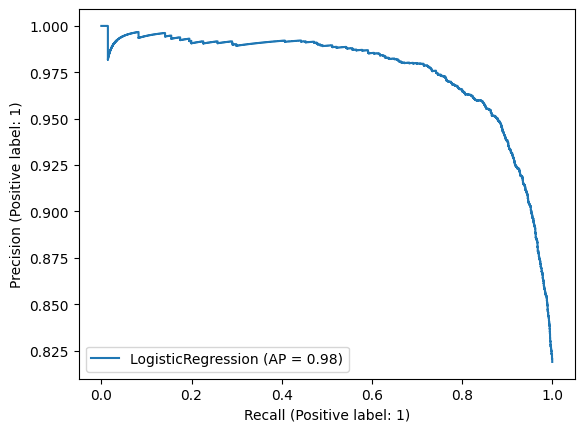

In [64]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(logistic,
                                      X_test_count,
                                      y_test);

### TF-IDF

In [65]:
# evaluate_classification_model(model, X_train, y_train, X_test, y_test)
logistic = LogisticRegression(max_iter=1000, class_weight= "balanced", random_state=42)
logistic.fit(X_train_tf_idf,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [66]:
print("LOGISTIC MODEL")
eval(logistic, X_train_tf_idf, X_test_tf_idf)

LOGISTIC MODEL

----------- Train Set -----------
[[ 3046   234]
 [ 1707 13120]]
Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.93      0.76      3280
           1       0.98      0.88      0.93     14827

    accuracy                           0.89     18107
   macro avg       0.81      0.91      0.84     18107
weighted avg       0.92      0.89      0.90     18107

----------- Test Set -----------
[[ 696  124]
 [ 495 3212]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.85      0.69       820
           1       0.96      0.87      0.91      3707

    accuracy                           0.86      4527
   macro avg       0.77      0.86      0.80      4527
weighted avg       0.89      0.86      0.87      4527



In [67]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-1': make_scorer(precision_score, pos_label=1),
            'recall-1': make_scorer(recall_score, pos_label=1),
            'f1-1': make_scorer(f1_score, pos_label=1)}

model = LogisticRegression(C=0.05, max_iter=1000, class_weight="balanced", random_state=42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores)
df_mean_scores = df_scores.mean()[['test_accuracy', 'test_precision-1', 'test_recall-1', 'test_f1-1']]

print("Mean Scores Across 10 Folds:")
print(df_mean_scores)

Mean Scores Across 10 Folds:
test_accuracy       0.840116
test_precision-1    0.964578
test_recall-1       0.835435
test_f1-1           0.895363
dtype: float64


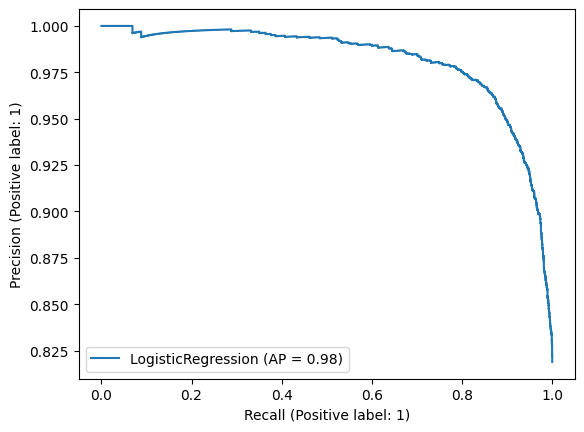

In [68]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(logistic,
                                      X_test_tf_idf,
                                      y_test);

## Naive Bayes

### Countvectorizer

In [69]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [70]:
# Fitting the Naive Bayes model
nb = MultinomialNB(alpha=1.5)
nb.fit(X_train_count, y_train)

MultinomialNB(alpha=1.5)

In [71]:
# Evaluating the Naive Bayes model
print("Naive Bayes")
eval(nb, X_train_count, X_test_count)

Naive Bayes

----------- Train Set -----------
[[ 2656   624]
 [ 1138 13689]]
Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      3280
           1       0.96      0.92      0.94     14827

    accuracy                           0.90     18107
   macro avg       0.83      0.87      0.85     18107
weighted avg       0.91      0.90      0.91     18107

----------- Test Set -----------
[[ 589  231]
 [ 335 3372]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       820
           1       0.94      0.91      0.92      3707

    accuracy                           0.87      4527
   macro avg       0.79      0.81      0.80      4527
weighted avg       0.88      0.87      0.88      4527



In [72]:
# Cross-validation for Naive Bayes
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-1': make_scorer(precision_score, pos_label=1),
            'recall-1': make_scorer(recall_score, pos_label=1),
            'f1-1': make_scorer(f1_score, pos_label=1)}

scores = cross_validate(nb, X_train_count, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores)
df_mean_scores = df_scores.mean()[['test_accuracy', 'test_precision-1', 'test_recall-1', 'test_f1-1']]

print("Mean Scores Across 10 Folds:")
print(df_mean_scores)

Mean Scores Across 10 Folds:
test_accuracy       0.884353
test_precision-1    0.942938
test_recall-1       0.914142
test_f1-1           0.928297
dtype: float64


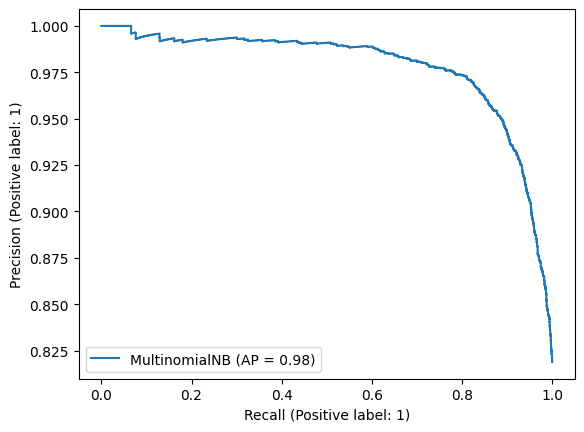

In [73]:
# Precision-Recall Display
PrecisionRecallDisplay.from_estimator(nb, X_test_count, y_test)

### TF-IDF

In [74]:
# Fitting the Naive Bayes model
nb = MultinomialNB(alpha=1.5)
nb.fit(X_train_tf_idf, y_train)

MultinomialNB(alpha=1.5)

In [75]:
print("nb MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

nb MODEL

----------- Train Set -----------
[[  542  2738]
 [   26 14801]]
Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.17      0.28      3280
           1       0.84      1.00      0.91     14827

    accuracy                           0.85     18107
   macro avg       0.90      0.58      0.60     18107
weighted avg       0.86      0.85      0.80     18107

----------- Test Set -----------
[[ 103  717]
 [   9 3698]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.13      0.22       820
           1       0.84      1.00      0.91      3707

    accuracy                           0.84      4527
   macro avg       0.88      0.56      0.57      4527
weighted avg       0.85      0.84      0.79      4527



In [76]:
# Cross-validation for Naive Bayes
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-1': make_scorer(precision_score, pos_label=1),
            'recall-1': make_scorer(recall_score, pos_label=1),
            'f1-1': make_scorer(f1_score, pos_label=1)}

scores = cross_validate(nb, X_train_tf_idf, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores)
df_mean_scores = df_scores.mean()[['test_accuracy', 'test_precision-1', 'test_recall-1', 'test_f1-1']]

print("Mean Scores Across 10 Folds:")
print(df_mean_scores)

Mean Scores Across 10 Folds:
test_accuracy       0.836858
test_precision-1    0.835006
test_recall-1       0.997977
test_f1-1           0.909244
dtype: float64


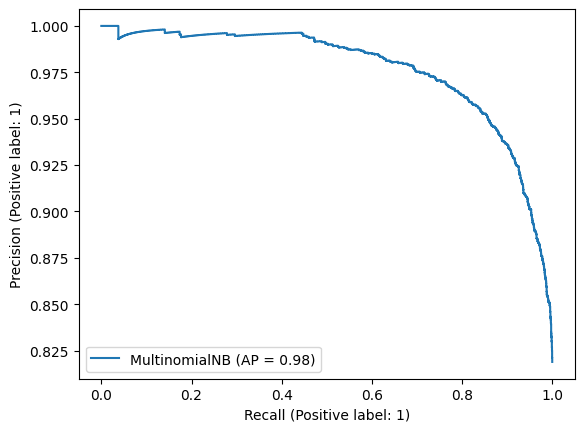

In [77]:
# Precision-Recall Display
PrecisionRecallDisplay.from_estimator(nb, X_test_tf_idf, y_test)

## Support Vector Machine (SVM)

### Countvectorizer

In [78]:
from sklearn.svm import LinearSVC

In [79]:
svc = LinearSVC(C=0.001,
                class_weight="balanced",
                random_state=42)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=42)

In [80]:
# Evaluating the Naive Bayes model
print("SVM Model")
eval(svc, X_train_count, X_test_count)

SVM Model

----------- Train Set -----------
[[ 2923   357]
 [ 2132 12695]]
Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.89      0.70      3280
           1       0.97      0.86      0.91     14827

    accuracy                           0.86     18107
   macro avg       0.78      0.87      0.81     18107
weighted avg       0.90      0.86      0.87     18107

----------- Test Set -----------
[[ 689  131]
 [ 598 3109]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.84      0.65       820
           1       0.96      0.84      0.90      3707

    accuracy                           0.84      4527
   macro avg       0.75      0.84      0.77      4527
weighted avg       0.88      0.84      0.85      4527



In [81]:
# Cross-validation for Naive Bayes
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-1': make_scorer(precision_score, pos_label=1),
            'recall-1': make_scorer(recall_score, pos_label=1),
            'f1-1': make_scorer(f1_score, pos_label=1)}

scores = cross_validate(svc, X_train_count, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores)
df_mean_scores = df_scores.mean()[['test_accuracy', 'test_precision-1', 'test_recall-1', 'test_f1-1']]

print("Mean Scores Across 10 Folds:")
print(df_mean_scores)

Mean Scores Across 10 Folds:
test_accuracy       0.848566
test_precision-1    0.962655
test_recall-1       0.847979
test_f1-1           0.901668
dtype: float64


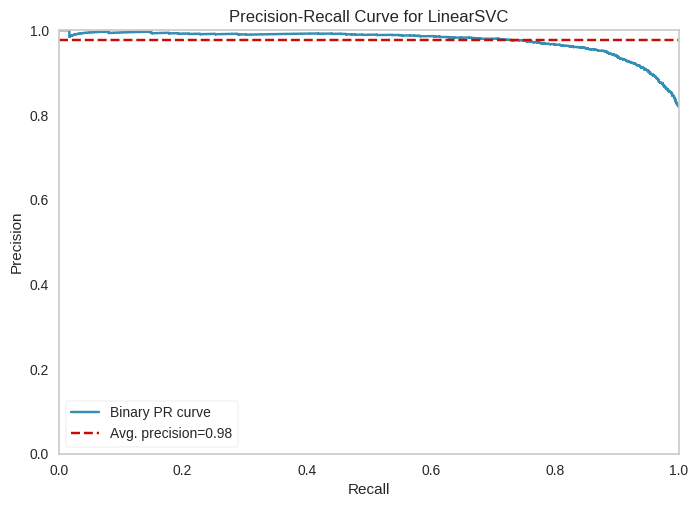

In [83]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LinearSVC(C=0.001, class_weight="balanced", random_state=42),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

### TD-IDF

In [84]:
svc = LinearSVC(C=0.001,
                class_weight="balanced",
                random_state=42)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=42)

In [85]:
# Evaluating the Naive Bayes model
print("SVM Model")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVM Model

----------- Train Set -----------
[[ 2851   429]
 [ 2632 12195]]
Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.87      0.65      3280
           1       0.97      0.82      0.89     14827

    accuracy                           0.83     18107
   macro avg       0.74      0.85      0.77     18107
weighted avg       0.89      0.83      0.85     18107

----------- Test Set -----------
[[ 696  124]
 [ 707 3000]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.85      0.63       820
           1       0.96      0.81      0.88      3707

    accuracy                           0.82      4527
   macro avg       0.73      0.83      0.75      4527
weighted avg       0.88      0.82      0.83      4527



In [86]:
# Cross-validation for Naive Bayes
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-1': make_scorer(precision_score, pos_label=1),
            'recall-1': make_scorer(recall_score, pos_label=1),
            'f1-1': make_scorer(f1_score, pos_label=1)}

scores = cross_validate(svc, X_train_tf_idf, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores)
df_mean_scores = df_scores.mean()[['test_accuracy', 'test_precision-1', 'test_recall-1', 'test_f1-1']]

print("Mean Scores Across 10 Folds:")
print(df_mean_scores)

Mean Scores Across 10 Folds:
test_accuracy       0.825922
test_precision-1    0.962159
test_recall-1       0.819652
test_f1-1           0.885195
dtype: float64


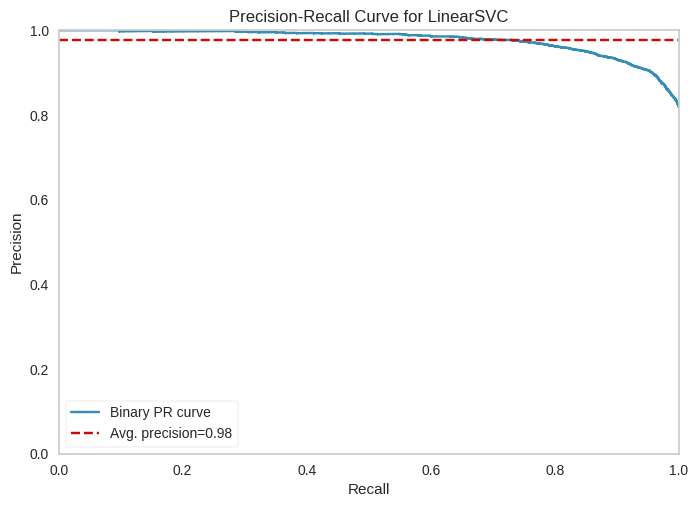

In [87]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.001, class_weight="balanced", random_state=42),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

## Random Forest

### Countvectorizer

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 50, random_state = 13, n_jobs = 1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(max_depth=50, n_jobs=1, random_state=13)

In [89]:
eval(rf, X_train_count, X_test_count)


----------- Train Set -----------
[[ 2611   669]
 [    1 14826]]
Train Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      3280
           1       0.96      1.00      0.98     14827

    accuracy                           0.96     18107
   macro avg       0.98      0.90      0.93     18107
weighted avg       0.96      0.96      0.96     18107

----------- Test Set -----------
[[ 131  689]
 [  22 3685]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.16      0.27       820
           1       0.84      0.99      0.91      3707

    accuracy                           0.84      4527
   macro avg       0.85      0.58      0.59      4527
weighted avg       0.84      0.84      0.80      4527



In [90]:
# Cross-validation for Naive Bayes
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-1': make_scorer(precision_score, pos_label=1),
            'recall-1': make_scorer(recall_score, pos_label=1),
            'f1-1': make_scorer(f1_score, pos_label=1)}

scores = cross_validate(rf, X_train_count, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores)
df_mean_scores = df_scores.mean()[['test_accuracy', 'test_precision-1', 'test_recall-1', 'test_f1-1']]

print("Mean Scores Across 10 Folds:")
print(df_mean_scores)

Mean Scores Across 10 Folds:
test_accuracy       0.845861
test_precision-1    0.844285
test_recall-1       0.995346
test_f1-1           0.913611
dtype: float64


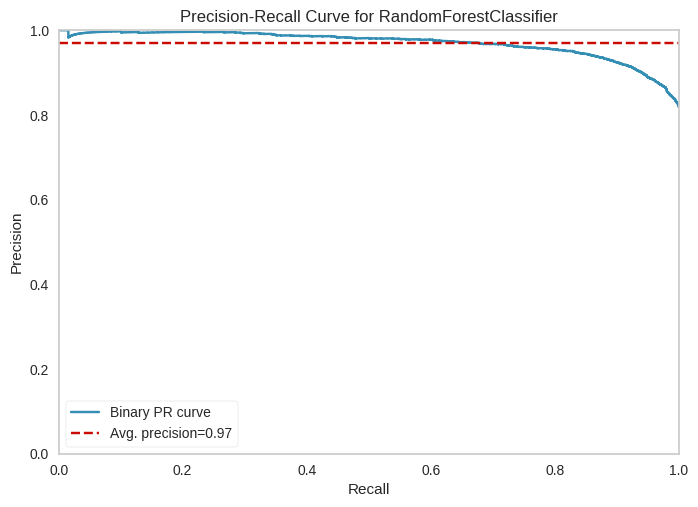

In [91]:
from sklearn.ensemble import RandomForestClassifier
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

### TF-IDF

In [92]:
rf = RandomForestClassifier(100,max_depth = 7,random_state = 42,n_jobs = -1,
                          class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [93]:
print("Random forest MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

Random forest MODEL

----------- Train Set -----------
[[ 2900   380]
 [ 2628 12199]]
Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.88      0.66      3280
           1       0.97      0.82      0.89     14827

    accuracy                           0.83     18107
   macro avg       0.75      0.85      0.77     18107
weighted avg       0.89      0.83      0.85     18107

----------- Test Set -----------
[[ 660  160]
 [ 732 2975]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.80      0.60       820
           1       0.95      0.80      0.87      3707

    accuracy                           0.80      4527
   macro avg       0.71      0.80      0.73      4527
weighted avg       0.86      0.80      0.82      4527



In [94]:
# Cross-validation for Naive Bayes
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-1': make_scorer(precision_score, pos_label=1),
            'recall-1': make_scorer(recall_score, pos_label=1),
            'f1-1': make_scorer(f1_score, pos_label=1)}

scores = cross_validate(rf, X_train_tf_idf, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores)
df_mean_scores = df_scores.mean()[['test_accuracy', 'test_precision-1', 'test_recall-1', 'test_f1-1']]

print("Mean Scores Across 10 Folds:")
print(df_mean_scores)

Mean Scores Across 10 Folds:
test_accuracy       0.820289
test_precision-1    0.948971
test_recall-1       0.824912
test_f1-1           0.882548
dtype: float64


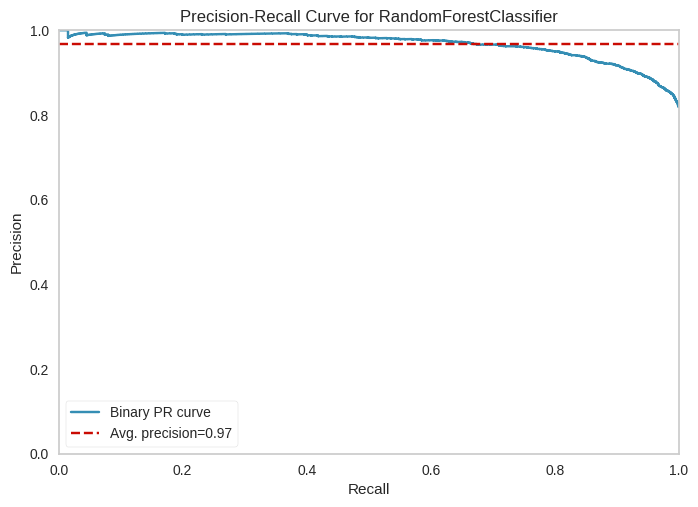

In [95]:
from sklearn.ensemble import RandomForestClassifier
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

## Ada Boosting

### Countvectorizer

In [96]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 100,
                         random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [97]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL

----------- Train Set -----------
[[ 1753  1527]
 [  680 14147]]
Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.53      0.61      3280
           1       0.90      0.95      0.93     14827

    accuracy                           0.88     18107
   macro avg       0.81      0.74      0.77     18107
weighted avg       0.87      0.88      0.87     18107

----------- Test Set -----------
[[ 428  392]
 [ 210 3497]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.52      0.59       820
           1       0.90      0.94      0.92      3707

    accuracy                           0.87      4527
   macro avg       0.79      0.73      0.75      4527
weighted avg       0.86      0.87      0.86      4527



In [98]:
# Cross-validation for Naive Bayes
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-1': make_scorer(precision_score, pos_label=1),
            'recall-1': make_scorer(recall_score, pos_label=1),
            'f1-1': make_scorer(f1_score, pos_label=1)}

scores = cross_validate(ada, X_train_count, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores)
df_mean_scores = df_scores.mean()[['test_accuracy', 'test_precision-1', 'test_recall-1', 'test_f1-1']]

print("Mean Scores Across 10 Folds:")
print(df_mean_scores)

Mean Scores Across 10 Folds:
test_accuracy       0.871265
test_precision-1    0.897186
test_recall-1       0.951912
test_f1-1           0.923729
dtype: float64


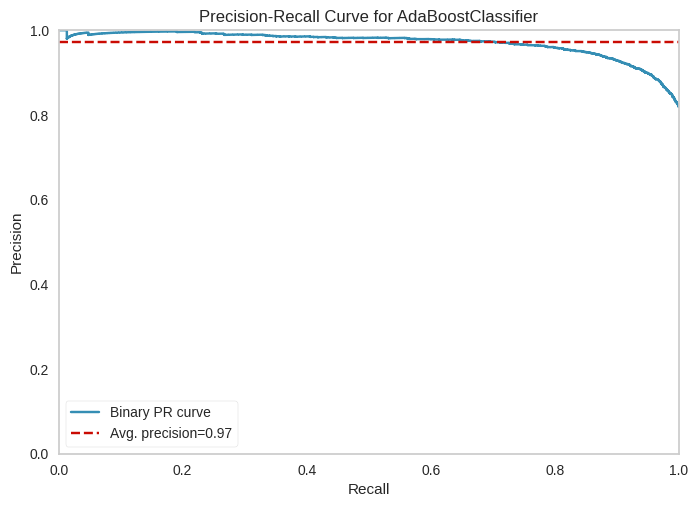

In [101]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 100,random_state = 42,learning_rate=0.7),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

### TF-IDF

In [102]:
ada = AdaBoostClassifier(n_estimators= 100,random_state = 42,learning_rate=0.7)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=100, random_state=42)

In [103]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL

----------- Train Set -----------
[[ 1535  1745]
 [  479 14348]]
Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.47      0.58      3280
           1       0.89      0.97      0.93     14827

    accuracy                           0.88     18107
   macro avg       0.83      0.72      0.75     18107
weighted avg       0.87      0.88      0.87     18107

----------- Test Set -----------
[[ 368  452]
 [ 135 3572]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.45      0.56       820
           1       0.89      0.96      0.92      3707

    accuracy                           0.87      4527
   macro avg       0.81      0.71      0.74      4527
weighted avg       0.86      0.87      0.86      4527



In [104]:
# Cross-validation for Naive Bayes
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-1': make_scorer(precision_score, pos_label=1),
            'recall-1': make_scorer(recall_score, pos_label=1),
            'f1-1': make_scorer(f1_score, pos_label=1)}

scores = cross_validate(ada, X_train_tf_idf, y_train, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores)
df_mean_scores = df_scores.mean()[['test_accuracy', 'test_precision-1', 'test_recall-1', 'test_f1-1']]

print("Mean Scores Across 10 Folds:")
print(df_mean_scores)

Mean Scores Across 10 Folds:
test_accuracy       0.867178
test_precision-1    0.884932
test_recall-1       0.963040
test_f1-1           0.922332
dtype: float64


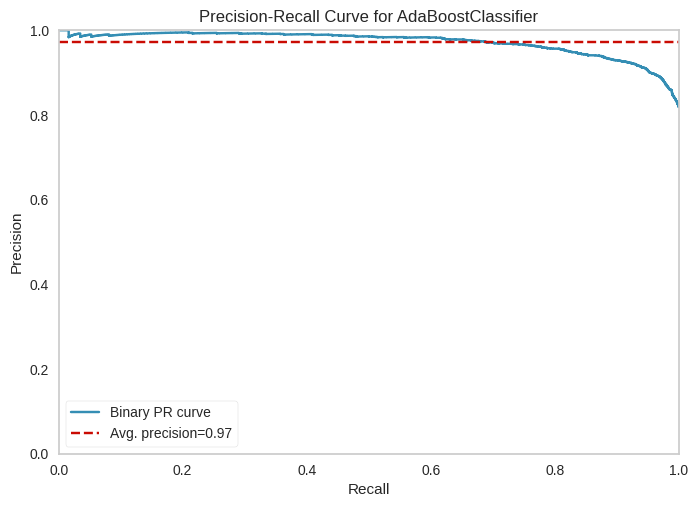

In [105]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 200, random_state = 13, learning_rate=0.8),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();


## DL modeling

In [107]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Tokenization

In [108]:
num_words = 18000
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'

In [109]:
tokenizer.fit_on_texts(X)

### Creating word index

In [110]:
tokenizer.word_index

{'dress': 1,
 'fit': 2,
 'not': 3,
 'size': 4,
 'love': 5,
 'top': 6,
 'like': 7,
 'color': 8,
 'look': 9,
 'wear': 10,
 'great': 11,
 'im': 12,
 'would': 13,
 'fabric': 14,
 'small': 15,
 'really': 16,
 'ordered': 17,
 'little': 18,
 'perfect': 19,
 'one': 20,
 'flattering': 21,
 'soft': 22,
 'well': 23,
 'back': 24,
 'comfortable': 25,
 'cute': 26,
 'nice': 27,
 'bought': 28,
 'beautiful': 29,
 'bit': 30,
 'material': 31,
 'large': 32,
 'shirt': 33,
 'much': 34,
 'sweater': 35,
 'length': 36,
 'run': 37,
 'jean': 38,
 'also': 39,
 'work': 40,
 'petite': 41,
 'got': 42,
 'long': 43,
 'short': 44,
 'waist': 45,
 'quality': 46,
 'medium': 47,
 'skirt': 48,
 'think': 49,
 'pretty': 50,
 'even': 51,
 'retailer': 52,
 'x': 53,
 'make': 54,
 'feel': 55,
 'tried': 56,
 'pant': 57,
 'store': 58,
 'usually': 59,
 'get': 60,
 'way': 61,
 'sleeve': 62,
 'good': 63,
 'could': 64,
 'big': 65,
 'made': 66,
 'cut': 67,
 'go': 68,
 'dont': 69,
 'didnt': 70,
 'still': 71,
 'style': 72,
 'right': 73,
 

In [111]:
len(tokenizer.word_index)

11976

### Converting tokens to numeric

In [112]:
X_num_tokens = tokenizer.texts_to_sequences(X)

### Maximum number of tokens for all documents¶

In [113]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [114]:
num_tokens.mean()

28.819563488557037

In [117]:
print('''
Tokens mean : {}
Tokens max  : {}
Tokens argmax : {}'''.format(num_tokens.mean()
,num_tokens.max()
,num_tokens.argmax()))


Tokens mean : 28.819563488557037
Tokens max  : 59
Tokens argmax : 11955


In [115]:
num_tokens.max()

59

In [121]:
max_tokens = 59

In [122]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [123]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")

In [124]:
X_pad.shape

(22634, 59)

In [127]:
X_pad

array([[   0,    0,    0, ...,  734,  514,   25],
       [   0,    0,    0, ...,  327,  600,   41],
       [   0,    0,    0, ..., 2707,  337,  788],
       ...,
       [   0,    0,    0, ...,   14,   13,   11],
       [   0,    0,    0, ...,   34, 1967,  127],
       [   0,    0,    0, ...,  172,  325,  140]], dtype=int32)

### Train Set Split

In [125]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=42)

### Modeling

In [129]:
model = Sequential()
embedding_size = 50

model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))

model.add(GRU(units=50, return_sequences=True))
model.add(GRU(units=25))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(lr=0.003)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [131]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 59, 50)            900000    
                                                                 
 gru (GRU)                   (None, 59, 50)            15300     
                                                                 
 gru_1 (GRU)                 (None, 25)                5775      
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 921101 (3.51 MB)
Trainable params: 921101 (3.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [132]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1,
                           patience = 5, restore_best_weights=True)

In [136]:
model.fit(X_train, y_train, epochs=25, batch_size=64,
         validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/25
287/287 [==============================] - 36s 124ms/step - loss: 0.2259 - recall: 0.9489 - val_loss: 0.2620 - val_recall: 0.9436
Epoch 2/25
287/287 [==============================] - 33s 117ms/step - loss: 0.1818 - recall: 0.9572 - val_loss: 0.2766 - val_recall: 0.9215
Epoch 3/25
287/287 [==============================] - 33s 115ms/step - loss: 0.1561 - recall: 0.9609 - val_loss: 0.3003 - val_recall: 0.8951
Epoch 4/25
287/287 [==============================] - 33s 113ms/step - loss: 0.1325 - recall: 0.9682 - val_loss: 0.3969 - val_recall: 0.9610
Epoch 5/25
287/287 [==============================] - 31s 108ms/step - loss: 0.1096 - recall: 0.9742 - val_loss: 0.3746 - val_recall: 0.9574
Epoch 6/25
287/287 [==============================] - 32s 113ms/step - loss: 0.0911 - recall: 0.9793 - val_loss: 0.3741 - val_recall: 0.9179
Epoch 7/25
287/287 [==============================] - 36s 125ms/step - loss: 0.0730 - recall: 0.9845 - val_loss: 0.4588 - val_recall: 0.9305
Epoch 8/25
28

### Model Evaluation

In [137]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.225931,0.948908,0.262017,0.943645
1,0.181826,0.957234,0.276607,0.921463
2,0.156150,0.960898,0.300334,0.895084
3,0.132548,0.968159,0.396935,0.961031
4,0.109577,0.974221,0.374597,0.957434


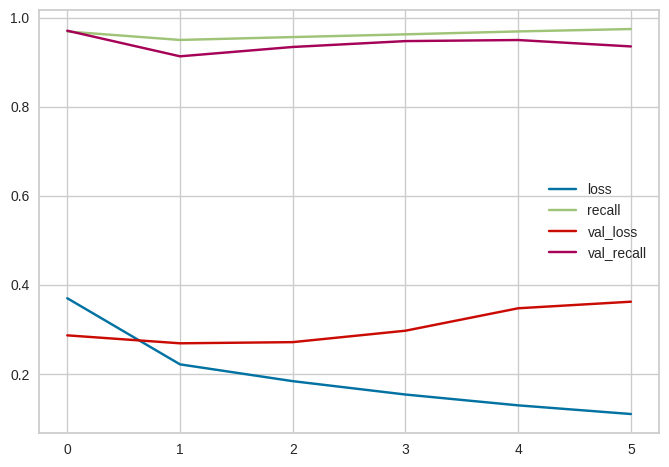

In [135]:
model_loss.plot();

In [138]:
model.evaluate(X_train, y_train)

573/573 [==============================] - 17s 29ms/step - loss: 0.1064 - recall: 0.9897


[0.10641049593687057, 0.9897415637969971]

In [139]:
model.evaluate(X_test, y_test)

71/71 [==============================] - 3s 35ms/step - loss: 0.3952 - recall: 0.9585


[0.39517080783843994, 0.9584681987762451]

71/71 [==============================] - 2s 32ms/step


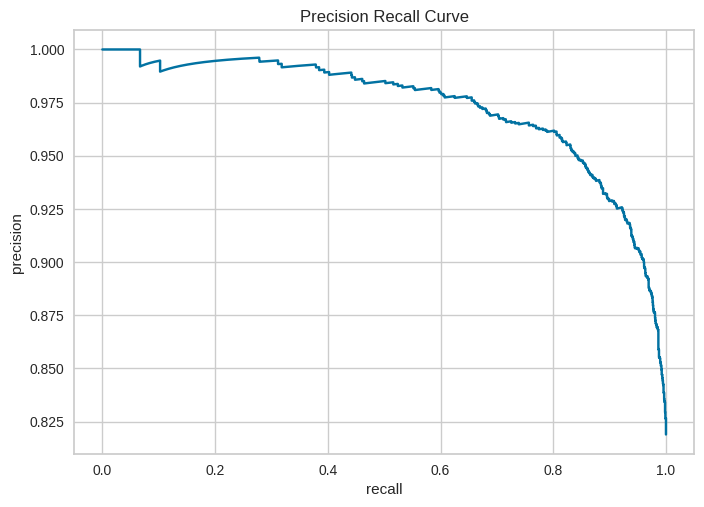

In [141]:
from sklearn.metrics import precision_recall_curve

y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()

In [142]:
y_pred = model.predict(X_test) >= 0.5

71/71 [==============================] - 3s 36ms/step


## BERT Modeling

In [143]:
!pip install livelossplot

In [144]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.0 MB/s eta 0:00:00


In [145]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.5 MB/s eta 0:00:00


### Tokenization

### Fixing token counts of all documents

### Transformation Vectors to Matrices

### Transformation Matrix to Tensorflow tensor

### Batch Size

### Creating optimization

### Creating Model with TPU

### Model Fiting

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___